YOUR NAME
 - Linh Tran

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


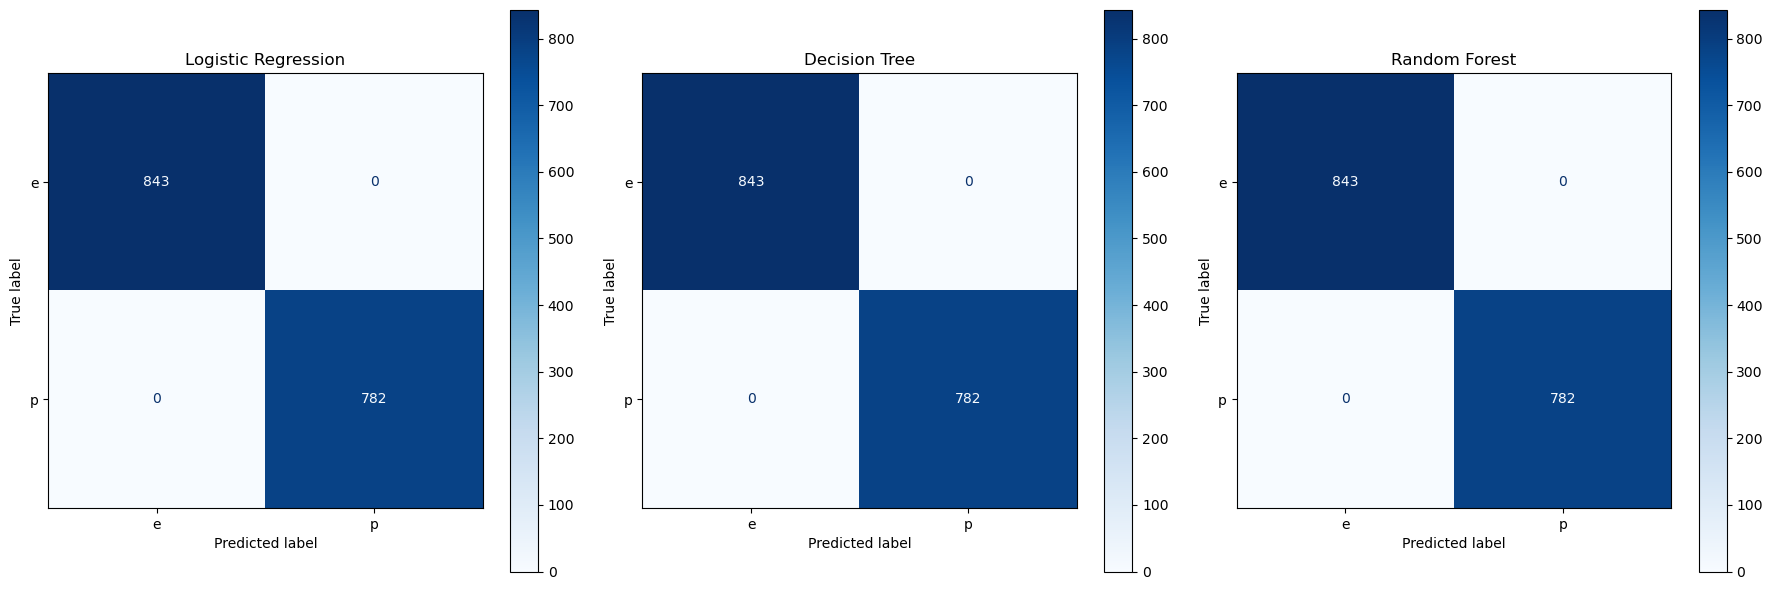

In [7]:

    y = mushrooms_df['type']
X = mushrooms_df.drop(columns='type')

ord_features = ['gill_spacing', 'gill_size', 'ring_number', 'population', 'bruises', 'stalk_shape', 'gill_attachment']
cat_features = [col for col in X.columns if col not in ord_features]

ordEnc = OrdinalEncoder(categories=[['c', 'w', 'd'], ['b', 'n'], ['n', 'o', 't'], ['a', 'c', 'n', 's', 'v', 'y'], ['t', 'f'], ['e', 't'], ['f', 'a']])
oneHotEnc = OneHotEncoder(sparse_output=False)

ct = ColumnTransformer([
    ('ord', ordEnc, ord_features),
    ('cat', oneHotEnc, cat_features)
], remainder='passthrough', verbose_feature_names_out=False)

X_trans = ct.fit_transform(X)
labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(y)
label_names = labEnc.classes_

feature_names = ct.get_feature_names_out()
X_df = pd.DataFrame(data=X_trans, columns=feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_trans, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model_LogReg = LogisticRegressionCV(penalty='l2', max_iter=10000)
model_LogReg.fit(X_train_scaled, y_train)
y_pred_log = model_LogReg.predict(X_test_scaled)
y_pred_log_prob = model_LogReg.predict_proba(X_test_scaled)

model_LogReg.C_[0]

tree_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
tree_clf.best_params_

rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_clf.best_params_

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, display_labels=label_names, ax=ax[0], cmap='Blues')
ax[0].set_title("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, display_labels=label_names, ax=ax[1], cmap='Blues')
ax[1].set_title("Decision Tree")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=label_names, ax=ax[2], cmap='Blues')
ax[2].set_title("Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
# Model Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"  - Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"  - Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"  - Precision: {precision_score(y_true, y_pred):.4f}\n")

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Random Forest", y_test, y_pred_rf)

print(f"Logistic Regression Best C: {model_LogReg.C_[0]}")
print(f"Decision Tree Best Parameters: {tree_clf.best_params_}")
print(f"Random Forest Best Parameters: {rf_clf.best_params_}")

Logistic Regression Performance:
  - Accuracy: 1.0000
  - Recall: 1.0000
  - Precision: 1.0000

Decision Tree Performance:
  - Accuracy: 1.0000
  - Recall: 1.0000
  - Precision: 1.0000

Random Forest Performance:
  - Accuracy: 1.0000
  - Recall: 1.0000
  - Precision: 1.0000

Logistic Regression Best C: 2.782559402207126
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: All three model are well present the data
- Hyper-parameters:
     - Logistic Regression Best C: 2.782559402207126
     - Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
     - Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
- Metrics
Logistic Regression
     - Accuracy: 1.0000
     - Recall: 1.0000
     - Precision: 1.0000
Decision Tree Performance:
  - Accuracy: 1.0000
  - Recall: 1.0000
  - Precision: 1.0000
Random Forest Performance:
  - Accuracy: 1.0000
  - Recall: 1.0000
  - Precision: 1.0000
- How did you decide best? These results can not help to decide the best model. We should look at the other factors like speed, etc. 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [27]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
nfl_draft.head()



,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


  0. Unnamed: 0 - [   0    1    2 ... 2798 2799 2800]
  1. round - [1 2 3 4 5 6 7]
  2. season - [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2022 2021 2020 2019 2018 2017 2023 2024]
  3. name - ['Dewayne Robertson' 'Terence Newman' 'Johnathan Sullivan' ...
 'Jaylen Harrell' 'Kalen King' 'Jaylen Key']
  4. age - [21. 25. 22. 23. 20. 24. nan 26.]
  5. position - ['DL' 'DB' 'LB']
  6. college_conference - [nan 'Big Twelve Conference' 'Pacific Ten Conference'
 'Mid-Eastern Athletic Conference' 'Atlantic Coast Conference'
 'Southeastern Conference' 'Big Sky Conference' 'Big East'
 'Sun Belt Conference' 'Big Ten Conference' 'Independent'
 'Pacific Twelve Conference' 'Ivy League' 'Colonial Athletic Association'
 'Ohio Valley Conference' 'Mid-American Conference'
 'Western Athletic Conference' 'Conference USA' 'Mountain West Conference'
 'Southland Conference' 'American Athletic Conference'
 'Southern Conference' 'Gulf South Conference' 'Big South Conference'
 'Mid-

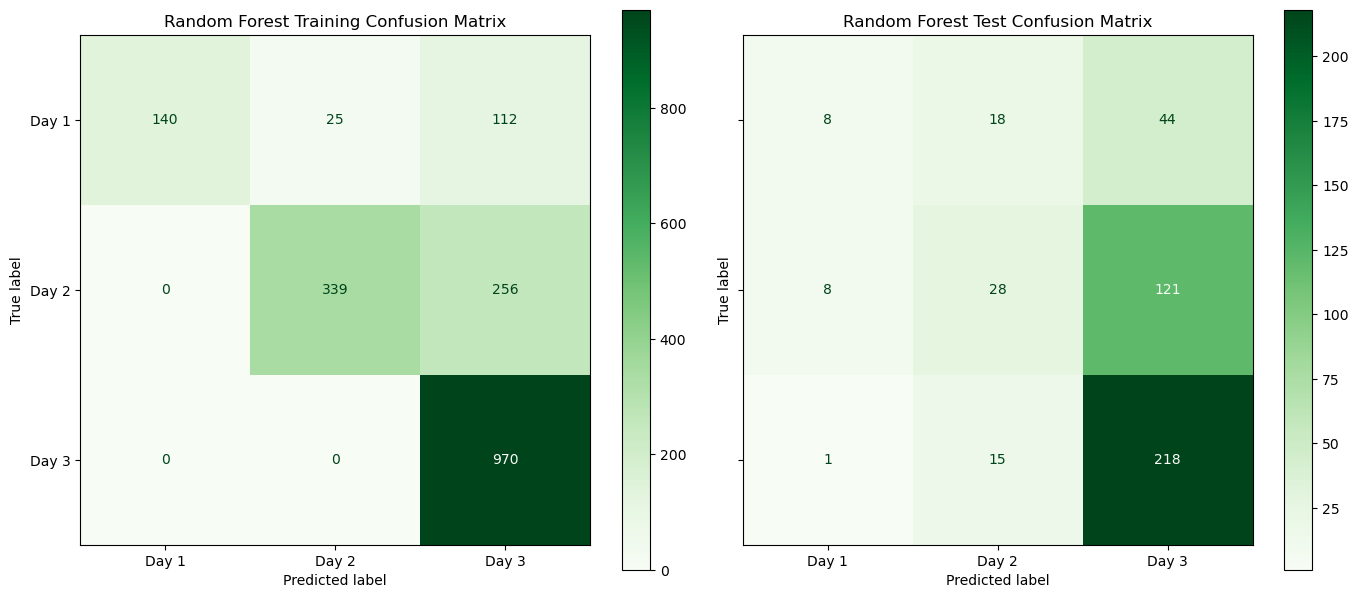

In [30]:
for k, col in enumerate(nfl_draft.columns):
    print(f'{k:>3}. {col} - {nfl_draft[col].unique()}')

# Function to assign draft day based on round
def assign_draft_day(round):
    if round == 1:
        return 'Day 1'
    elif round in [2, 3]:
        return 'Day 2'
    elif round in [4, 5, 6, 7]:
        return 'Day 3'

# Create the 'draft_day' column based on the round
nfl_draft['draft_day'] = nfl_draft['round'].apply(assign_draft_day)

# Drop irrelevant columns
nfl_df = nfl_draft.drop(columns=['Unnamed: 0', 'round', 'name'])

# Define numeric and categorical features
numeric_features = ['age', 'height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'season']
categorical_features = ['position', 'college_conference']

# Handle missing values if necessary
# nfl_df = nfl_df.dropna()

# Define target variable and features
X = nfl_df[numeric_features + categorical_features]
y = nfl_df['draft_day']

# Encode target variable 'draft_day'
labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(y)
label_names = labEnc.classes_

# Set up ColumnTransformer for encoding
ct_nfl = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Transform the features
X_trans = ct_nfl.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
rf_params = {
    'n_estimators': [80, 100],
    'max_depth': [8, 9, 10],
    'min_samples_split': [3, 7]
}

rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)
y_train_pred = rf_clf.predict(X_train)

# Print the best hyperparameters and evaluation metrics
print("Best Parameters:", rf_clf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# Create confusion matrices for training and testing
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Training confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=label_names, ax=ax[0], cmap='Greens')
ax[0].set_title("Random Forest Training Confusion Matrix")

# Testing confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_names, ax=ax[1], cmap='Greens')
ax[1].set_title("Random Forest Test Confusion Matrix")

plt.tight_layout()
plt.show()


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
I used a Random Forest Classifier because it handles both categorical and numerical features well, reduces overfitting, and provides feature importance insights. 
 - What was your accuracy? The accuracy is 55%